# Titanic Visualization

In [5]:
%%HTML
<script type='text/javascript' src='https://public.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 700px; height: 900px;'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_74&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz' width='750' height='920' style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Titanic_74&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_74&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='showVizHome' value='no' /><param name='showTabs' value='y' /><param name='bootstrapWhenNotified' value='true' /></object></div>


## Things I have Already Done in Excel
---
1. 
2. 
3. 

## Importing the Data

In [6]:
#Import appropriate libraries
import IPython.display as ip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.linear_model as lm
import sklearn.tree as tree
import sklearn.ensemble as ens
from sklearn import metrics
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
from sklearn import datasets

%matplotlib inline

In [7]:
#Load the Titanic Dataset
import pivottablejs as pvt
df = pd.read_excel('Data/Titanic/train.xlsx', sheetname = 'logistic')
pvt.pivot_ui(df)

In [8]:
# Define X and y.  X are the featuers and y is the Outcome we are trying to predict.

X = df[['AdjAge', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Embarked2', 'Sex2', 'Title2']]
y = df['Survived']
X.columns

Index(['AdjAge', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Embarked2', 'Sex2',
       'Title2'],
      dtype='object')

### Define the Models

In [9]:
lr = lm.LogisticRegression()
dt = tree.DecisionTreeClassifier()
rf = ens.RandomForestClassifier()

### Train the Models

In [10]:
cvs = 10
njobs = -1
lr_model = cv.cross_val_score(lr, X, y, cv = cvs, n_jobs=njobs, scoring='roc_auc')
dt_model = cv.cross_val_score(dt, X, y, cv = cvs, n_jobs=njobs, scoring='roc_auc')
rf_model = cv.cross_val_score(rf, X, y, cv = cvs, n_jobs=njobs, scoring='roc_auc')

### Compare Models

In [11]:
#Compare Models based on the best mean AUC score
lr_score = lr_model.mean()
dt_score = dt_model.mean()
rf_score = rf_model.mean()
lr_score, dt_score, rf_score

(0.85173796791443857, 0.76358140225787285, 0.84097098435333739)

# `Place AUC Charts here`

 - Area Under the Curve Scores
   1. Logistic Regression  =  85.17%
   2. Random Forest = 84.25%
   3. Decision Tree  = 75.34%
   ---
   
 Based on the results of the scoring, we choose to proceed with the Logistic Regression

### Optimize the Model Parameters

In [14]:
c_range = np.logspace(0, 4, 10)
c_range

array([  1.00000000e+00,   2.78255940e+00,   7.74263683e+00,
         2.15443469e+01,   5.99484250e+01,   1.66810054e+02,
         4.64158883e+02,   1.29154967e+03,   3.59381366e+03,
         1.00000000e+04])

In [15]:
param_dict = dict(C=c_range)
lr_grid = gs.GridSearchCV(lr, param_dict, cv=cvs, scoring='roc_auc')

In [16]:
lr_grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e+00,   2.78256e+00,   7.74264e+00,   2.15443e+01,
         5.99484e+01,   1.66810e+02,   4.64159e+02,   1.29155e+03,
         3.59381e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [17]:
lr_grid.grid_scores_

[mean: 0.85172, std: 0.02391, params: {'C': 1.0},
 mean: 0.85220, std: 0.02411, params: {'C': 2.7825594022071245},
 mean: 0.85242, std: 0.02415, params: {'C': 7.7426368268112693},
 mean: 0.85268, std: 0.02400, params: {'C': 21.544346900318832},
 mean: 0.85290, std: 0.02404, params: {'C': 59.948425031894089},
 mean: 0.85279, std: 0.02386, params: {'C': 166.81005372000593},
 mean: 0.85274, std: 0.02375, params: {'C': 464.15888336127773},
 mean: 0.85279, std: 0.02382, params: {'C': 1291.5496650148827},
 mean: 0.85274, std: 0.02375, params: {'C': 3593.8136638046258},
 mean: 0.85279, std: 0.02382, params: {'C': 10000.0}]

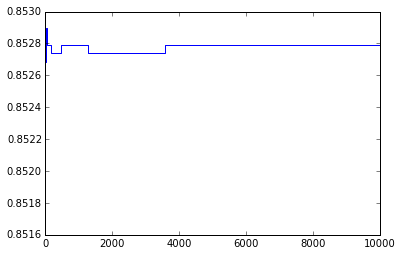

In [18]:
lr_grid_scores = [score.mean_validation_score for score in lr_grid.grid_scores_]
ax = plt.plot(c_range, lr_grid_scores, drawstyle='steps')

In [19]:
lr_grid.best_score_, lr_grid.best_params_

(0.85289900259793738, {'C': 59.948425031894089})

In [20]:
lr_c = lr_grid.best_params_.get('C')

### Use Optimal Parameters In Model

In [21]:
lr = lm.LogisticRegression(C=lr_c)
model = lr.fit(X,y)

In [22]:
model.predict_proba(X)

array([[ 0.91496249,  0.08503751],
       [ 0.09719615,  0.90280385],
       [ 0.34671171,  0.65328829],
       ..., 
       [ 0.49368762,  0.50631238],
       [ 0.42319475,  0.57680525],
       [ 0.87374175,  0.12625825]])

In [23]:
# This is the Null Error Rate which means that we could achieve ~62% accuracy
# just by predicting "No" for each sample
1 - y.mean()

0.6175478065241844

In [24]:
#Provide the probabilities for each prediction (formula 1) as well as the prediction value (formula 2)
prediction_prob = model.predict_proba(X)
prediction = model.predict(X)
metrics.f1_score(y, prediction), prediction_prob

(0.72615384615384604, array([[ 0.91496249,  0.08503751],
        [ 0.09719615,  0.90280385],
        [ 0.34671171,  0.65328829],
        ..., 
        [ 0.49368762,  0.50631238],
        [ 0.42319475,  0.57680525],
        [ 0.87374175,  0.12625825]]))

In [25]:
np.transpose(model.coef_), model.get_params

(array([[ -3.80448981e-02],
        [  2.30324205e-03],
        [ -3.42538716e-01],
        [ -8.03802897e-02],
        [ -1.10182903e+00],
        [  2.39046901e-01],
        [  2.67167098e+00],
        [ -4.85769059e-02]]),
 <bound method LogisticRegression.get_params of LogisticRegression(C=59.948425031894089, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0)>)

In [26]:
#Confusion Matrix
metrics.confusion_matrix(y, prediction), metrics.roc_auc_score(y, prediction_prob[:, 1])

(array([[475,  74],
        [104, 236]]), 0.8562011143255116)

# Widgets

In [27]:
import ipywidgets as ipw
import IPython.display as display

In [28]:
def predict(Age,Fare,Family,Parch,Pclass,Embarked,Gender,Title):    
    return(model.predict([Age,Fare,Family,Parch,Pclass,Embarked,Gender,Title]), model.predict_proba([Age,Fare,Family,Parch,Pclass,Embarked,Gender,Title]))

In [29]:
ipw.interact(predict, 
             Age = ipw.FloatSlider(min = np.min(X['AdjAge']), max = np.max(X['AdjAge']), step = 0.5, value = 20),
             Fare = ipw.FloatSlider(min = np.min(X['Fare']), max = np.max(X['Fare']), step = 0.5, value = 20),
             Family = ipw.FloatSlider(min = np.min(X['SibSp']), max = np.max(X['SibSp']), step = 1, value = 2),
             Parch = ipw.FloatSlider(min = np.min(X['Parch']), max = np.max(X['Parch']), step = 1, value = 2),
             Pclass = ipw.FloatSlider(min = np.min(X['Pclass']), max = np.max(X['Pclass']), step = 1, value = 1),
             Embarked = ipw.FloatSlider(min = np.min(X['Embarked2']), max = np.max(X['Embarked2']), step = 1, value = 1),
             Gender = ipw.FloatSlider(min = np.min(X['Sex2']), max = np.max(X['Sex2']), step = 1, value = 1),
             Title = ipw.FloatSlider(min = np.min(X['Title2']), max = np.max(X['Title2']), step = 1, value = 1)
            )
print('Probability Dead: ',)

(array([1], dtype=int64), array([[ 0.06685458,  0.93314542]]))

# To-Do
---
 - Fix Prediction and Probabilities from Interactive Sliders
 - Add Graphs to White-paper
 - Add to Tableau
   - Add Explanation
 - Complete Expanations
 - Fix IPywidgets to work on HTML